<a href="https://colab.research.google.com/github/june12mayank/Notebooks/blob/master/tesseract_opencv_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Image of Aadhar

In [0]:
# For uploading image from local system
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

start from here if not upload file.

In [0]:
#all installing and importing here
import numpy as np
!pip install pytesseract
! apt install tesseract-ocr
! apt install libtesseract-dev
! pip install Pillow
! pip install pytesseract
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image
import cv2 
from google.colab.patches import cv2_imshow
from pytesseract import Output
import re

In [0]:
#getting a random aadhar image
#!wget -O 'image.jpg' 'http://www.fakingnews.com/wp-content/uploads/2017/04/lead-smith-adhar-copy-584x403.jpg'
!wget -O 'image.jpg' 'http://scce.ac.in/parent12/aadhaar.jpg'
#!wget -O 'image.jpg' 'https://i.pinimg.com/236x/b8/9d/18/b89d181068f523311247af57520f4668.jpg'
#!wget -O 'image.jpg' 'https://www.consumercomplaints.in/thumb.php?complaints=1594514&src=49269480.jpg'

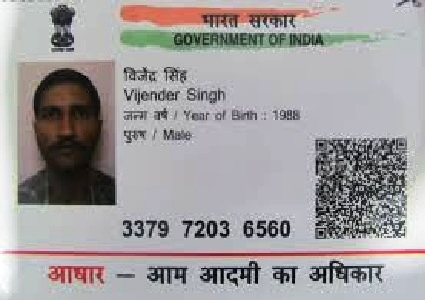

In [18]:
#showing image using opencv
img=cv2.imread('image.jpg')
cv2_imshow(img)

In [0]:
!wget -O 'i.jpg' 'http://felix.abecassis.me/wp-content/uploads/2011/09/p16.jpg'

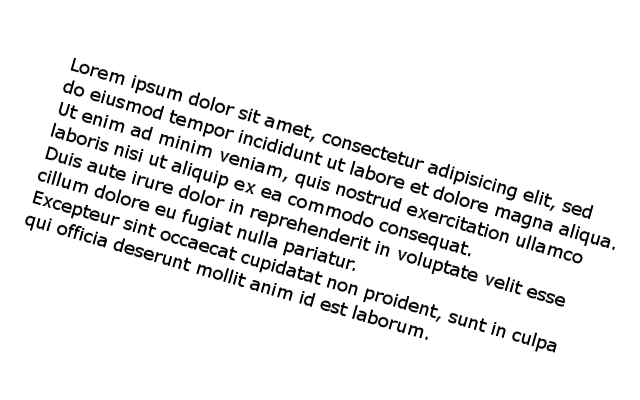

In [50]:
img_dilate=cv2.imread('i.jpg',0)
cv2_imshow(img_dilate)

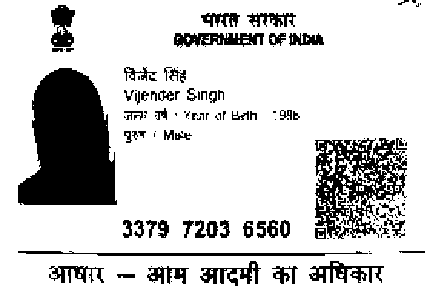

In [16]:
l= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(l,115,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)

In [31]:
custom_config = r'-l eng --oem 3 --psm 3'
txt=pytesseract.image_to_string(th3, config=custom_config)
txt

''

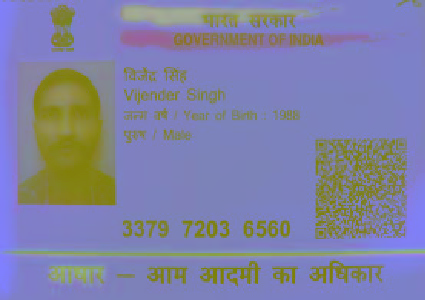

In [10]:
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

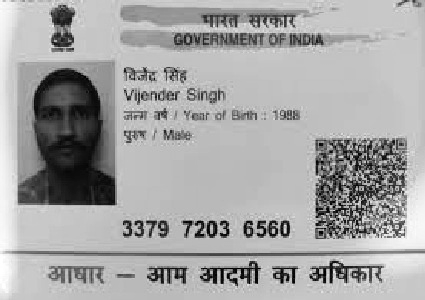

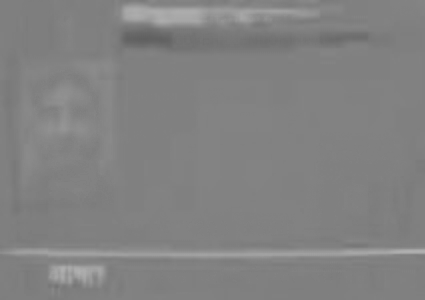

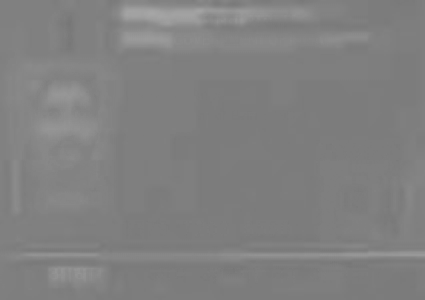

In [11]:
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2_imshow(l)
cv2_imshow(a)
cv2_imshow(b)

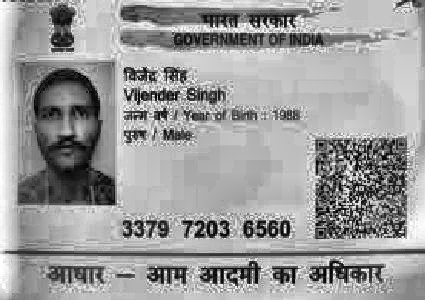

In [14]:
#-----Applying CLAHE (Contrast Limited Adaptive Histogram Equalization) to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2_imshow(cl)

In [20]:
custom_config = r'-l eng --oem 3 --psm 3'
txt=pytesseract.image_to_string(img, config=custom_config)
txt

'z ee\n\nfasta fig\n\nVijender Singh\n\nwen 74 Year of Bith : 1988\nyet Mate:\n\n3379 7203 6560'

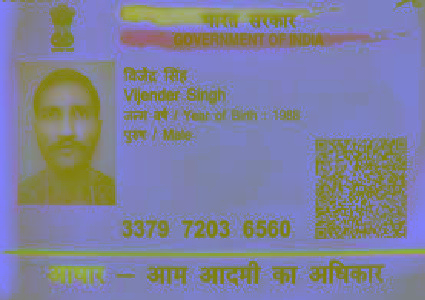

In [15]:
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2_imshow(limg)

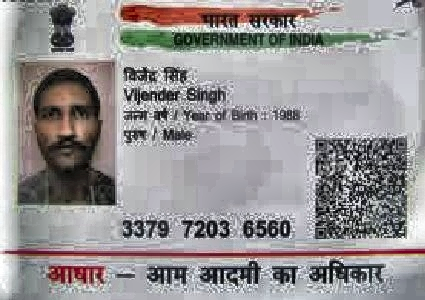

In [16]:
#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2_imshow(final)

In [19]:
custom_config = r'--oem 3 --psm 3'
txt=pytesseract.image_to_string(img, config=custom_config)
txt

'z ee\n\nfasta fig\n\nVijender Singh\n\nwen 74 Year of Bith : 1988\nyet Mate:\n\n3379 7203 6560'

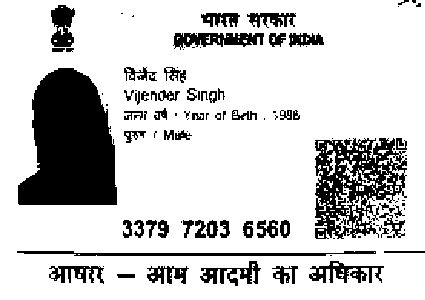

In [0]:
#read grayscale
im_gray = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
#greyscale to binary
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(im_bw)


In [0]:
custom_config = r'-l eng --oem 3 --psm 3'
txt=pytesseract.image_to_string(im_bw, config=custom_config)
txt

In [0]:
def resize(img,scale):
  print('Original Dimensions : ',img.shape)
  scale_percent = scale      # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
  print('Resized Dimensions : ',resized.shape)
  cv2_imshow(resized)

resize(img,150)

Original Dimensions :  (300, 425, 3)
Resized Dimensions :  (450, 637, 3)


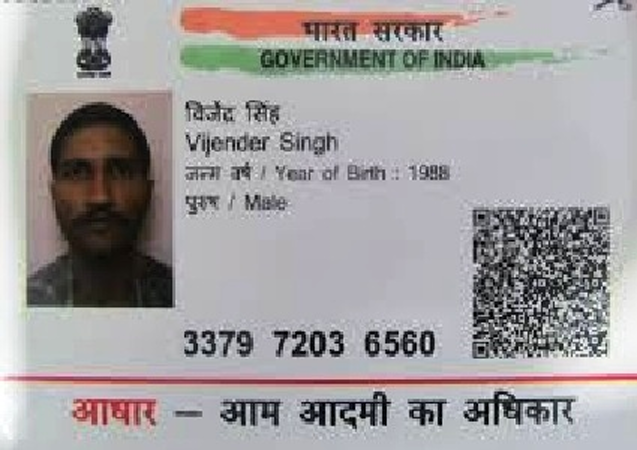

In [0]:
#regex code
def regex(img_string):
  name=re.fullmatch('[A-Za-z]{2,25}( [A-Za-z]{2,25})?', img_string)
  aadhar= re.fullmatch('^\d{4}\s\d{4}\s\d{4}$'), img_string)
  year=re.findall('^(19|20)\d{2}$',img_string)

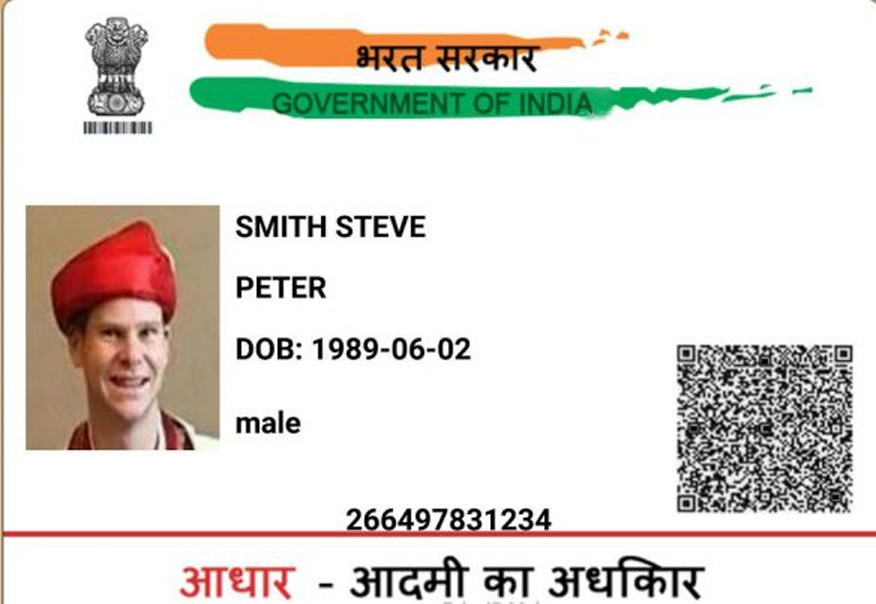

In [0]:
new_img= cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
cv2_imshow(new_img)

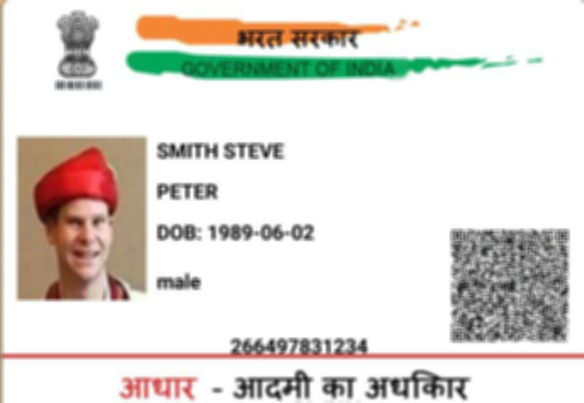

In [0]:
img = cv2.blur(img,(5,5))

cv2_imshow(img)

In [0]:
#conversion to text with custom parameters.
custom_config = r'-l eng --oem 3 --psm 3'
txt=pytesseract.image_to_string(img, config=custom_config)
lst=txt.split('\n')
for i in lst:
  if i!='':
    print(i)

SMITH STEVE
PETER
DOB: 1989-06-02
male


Everything above work 1
Roi starts here

In [0]:
from skimage.filters import threshold_local
import imutils

In [0]:
def order_points(pts):
	rect = np.zeros((4, 2), dtype = "float32")
 
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
 
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]

	return rect

def four_point_transform(image, pts):
	rect = order_points(pts)
	(tl, tr, br, bl) = rect
 
	widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
	widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
	maxWidth = max(int(widthA), int(widthB))
 
	heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
	heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
	maxHeight = max(int(heightA), int(heightB))
 
	dst = np.array([
		[0, 0],
		[maxWidth - 1, 0],
		[maxWidth - 1, maxHeight - 1],
		[0, maxHeight - 1]], dtype = "float32")
 
	# compute the perspective transform matrix and then apply it
	M = cv2.getPerspectiveTransform(rect, dst)
	warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
 
	# return the warped image
	return warped

In [0]:
image = cv2.imread('image.jpg')
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
 
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2_imshow(image)
cv2_imshow(edged)


In [0]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
# loop over the contours
# our approximated contour should have four points
for c in cnts:
	# approximate the contour
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02 * peri, True)
  if len(approx) == 4:
    screenCnt = approx
    break

# show the contour 
print("STEP 2: Find contours of paper")
cv2.drawContours(image,[screenCnt], -1, (0, 255, 0), 2)
cv2.imshow(image)

In [0]:
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
 
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
 
# show the scanned image and save one copy in out folder
print("STEP 3: Apply perspective transform")

imS = cv2.resize(warped, (650, 650))
cv2.imshow("output",imS)
cv2.imwrite('out/'+'Output Image.PNG', imS)

In [0]:
output = pytesseract.image_to_string(PIL.Image.open('out/'+ 'Output Image.PNG').convert("RGB"), lang='eng')
print(output)

f = open('email.json','w')
f.write(output)
f.close()

In [0]:
#regular expression to find emails
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", output)
#regular expression to find phone numbers
numbers = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', output)

print(numbers)
print(emails)

for email in emails:
	print('EMAIL :-> ' + email)
	F = open('emails.json','a+')
	F.write('EMAIL :-> ' + email)

for number in numbers:
	print('Phone No. :-> ' + number)
	F = open('emails.json', 'a+')
	F.write('\n Phone No. :-> ' + number)

New trial from here.

In [0]:
from imutils.object_detection import non_max_suppression

In [0]:
def decode_predictions(scores, geometry):
	# grab the number of rows and columns from the scores volume, then
	# initialize our set of bounding box rectangles and corresponding
	# confidence scores
	(numRows, numCols) = scores.shape[2:4]
	rects = []
	confidences = []
	# loop over the number of rows
	for y in range(0, numRows):
		# extract the scores (probabilities), followed by the
		# geometrical data used to derive potential bounding box
		# coordinates that surround text
		scoresData = scores[0, 0, y]
		xData0 = geometry[0, 0, y]
		xData1 = geometry[0, 1, y]
		xData2 = geometry[0, 2, y]
		xData3 = geometry[0, 3, y]
		anglesData = geometry[0, 4, y]
		# loop over the number of columns
		for x in range(0, numCols):
			# if our score does not have sufficient probability,
			# ignore it
			if scoresData[x] < args["min_confidence"]:
				continue
			# compute the offset factor as our resulting feature
			# maps will be 4x smaller than the input image
			(offsetX, offsetY) = (x * 4.0, y * 4.0)
			# extract the rotation angle for the prediction and
			# then compute the sin and cosine
			angle = anglesData[x]
			cos = np.cos(angle)
			sin = np.sin(angle)
			# use the geometry volume to derive the width and height
			# of the bounding box
			h = xData0[x] + xData2[x]
			w = xData1[x] + xData3[x]
			# compute both the starting and ending (x, y)-coordinates
			# for the text prediction bounding box
			endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
			endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
			startX = int(endX - w)
			startY = int(endY - h)
			# add the bounding box coordinates and probability score
			# to our respective lists
			rects.append((startX, startY, endX, endY))
			confidences.append(scoresData[x])
	# return a tuple of the bounding boxes and associated confidences
	return (rects, confidences)

In [0]:
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", type=str,
	help="path to input image")
ap.add_argument("-east", "--east", type=str,
	help="path to input EAST text detector")
ap.add_argument("-c", "--min-confidence", type=float, default=0.5,
	help="minimum probability required to inspect a region")
ap.add_argument("-w", "--width", type=int, default=320,
	help="nearest multiple of 32 for resized width")
ap.add_argument("-e", "--height", type=int, default=320,
	help="nearest multiple of 32 for resized height")
ap.add_argument("-p", "--padding", type=float, default=0.0,
	help="amount of padding to add to each border of ROI")
args = vars(ap.parse_args())

In [0]:
# load the input image and grab the image dimensions
image = cv2.imread('image.jpg')
orig = image.copy()
(origH, origW) = image.shape[:2]
# set the new width and height and then determine the ratio in change
# for both the width and height
(newW, newH) = (500, 400)
rW = origW / float(newW)
rH = origH / float(newH)
# resize the image and grab the new image dimensions
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [8]:
# define the two output layer names for the EAST detector model that
# we are interested in -- the first is the output probabilities and the
# second can be used to derive the bounding box coordinates of text
layerNames = [
	"feature_fusion/Conv_7/Sigmoid",
	"feature_fusion/concat_3"]
# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet(args["east"])

[INFO] loading EAST text detector...


NameError: ignored

In [0]:
# construct a blob from the image and then perform a forward pass of
# the model to obtain the two output layer sets
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
	(123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
# decode the predictions, then  apply non-maxima suppression to
# suppress weak, overlapping bounding boxes
(rects, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [9]:
# initialize the list of results
results = []
# loop over the bounding boxes
for (startX, startY, endX, endY) in boxes:
	# scale the bounding box coordinates based on the respective
	# ratios
	startX = int(startX * rW)
	startY = int(startY * rH)
	endX = int(endX * rW)
	endY = int(endY * rH)
	# in order to obtain a better OCR of the text we can potentially
	# apply a bit of padding surrounding the bounding box -- here we
	# are computing the deltas in both the x and y directions
	dX = int((endX - startX) * args["padding"])
	dY = int((endY - startY) * args["padding"])
	# apply padding to each side of the bounding box, respectively
	startX = max(0, startX - dX)
	startY = max(0, startY - dY)
	endX = min(origW, endX + (dX * 2))
	endY = min(origH, endY + (dY * 2))
	# extract the actual padded ROI
	roi = orig[startY:endY, startX:endX]

NameError: ignored

In [0]:
	# in order to apply Tesseract v4 to OCR text we must supply
	# (1) a language, (2) an OEM flag of 4, indicating that the we
	# wish to use the LSTM neural net model for OCR, and finally
	# (3) an OEM value, in this case, 7 which implies that we are
	# treating the ROI as a single line of text
	config = ("-l eng --oem 1 --psm 7")
	text = pytesseract.image_to_string(roi, config=config)
	# add the bounding box coordinates and OCR'd text to the list
	# of results
	results.append(((startX, startY, endX, endY), text))

In [0]:
# sort the results bounding box coordinates from top to bottom
results = sorted(results, key=lambda r:r[0][1])
# loop over the results
for ((startX, startY, endX, endY), text) in results:
	# display the text OCR'd by Tesseract
	print("OCR TEXT")
	print("========")
	print("{}\n".format(text))
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV, then draw the text and a bounding box surrounding
	# the text region of the input image
	text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
	output = orig.copy()
	cv2.rectangle(output, (startX, startY), (endX, endY),
		(0, 0, 255), 2)
	cv2.putText(output, text, (startX, startY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
	# show the output image
	cv2.imshow("Text Detection", output)
	cv2.waitKey(0)